In [4]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [12]:
import xgboost as xgb
import lightgbm as lgb

# **Load Data**

In [6]:
def load_datatrain():
    train = pd.read_csv('application_train.csv')
    return train

In [7]:
def load_datatest():
    test = pd.read_csv('application_test.csv')
    return test

In [8]:
# Training data
app_train = load_datatrain()
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:

app_test = load_datatest()
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
app_train['TARGET'].value_counts()
#count the value of target in each class

0    282686
1     24825
Name: TARGET, dtype: int64

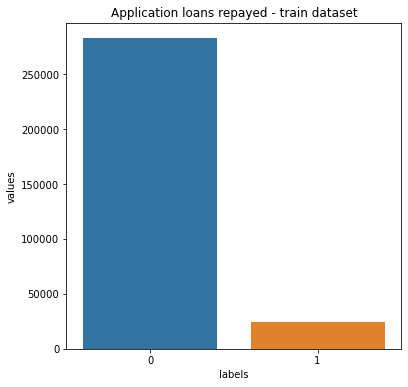

In [11]:
temp = app_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()

plt.savefig('Application loans repayed.png')
plt.show()


# **MISSING VALUE**

In [10]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(10)


Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


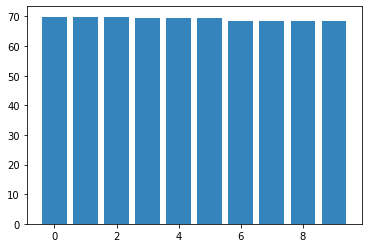

In [12]:
objects = missing_values.head(10).index
y_pos = np.arange(len(objects))
per = missing_values['% of Total Values'].head(10)
plt.bar(y_pos,per, align='center',alpha=0.9)
plt.show()

# **Column Type**

In [13]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [14]:
# Number of unique(Categorical) classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [15]:
app_train['EMERGENCYSTATE_MODE'].value_counts()s

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

# **Encoding Categorical Variables**




In [16]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


NAME_CONTRACT_TYPE ,FLAG_OWN_CAR ,FLAG_OWN_REALTY               

In [17]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


## Aligning Training and Testing 




In [18]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


## **EDA**

In [19]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Column['DAYS_BIRTH']  Not have Outier

In [20]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Column['DAYS_EMPLOYED']  have Outier



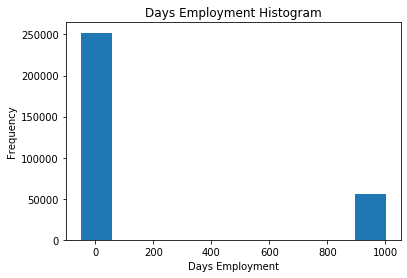

In [21]:
(app_train['DAYS_EMPLOYED'] / 365).plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');
plt.savefig('Days Employment Histogram.png')

Have just the one value of Oulier = 365243

In [22]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Anomalies(Abnormal) have more probability to pay loan more than non-anomalies

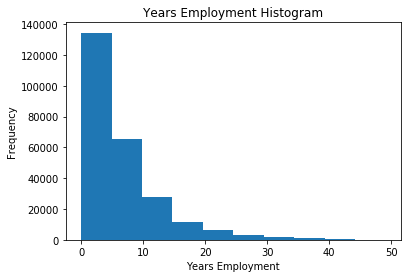

In [23]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

(app_train['DAYS_EMPLOYED']/-365).plot.hist(title = 'Years Employment Histogram');
plt.xlabel('Years Employment');
plt.savefig('Years Employment Histogram.png')

In [24]:
print('There are %d anomalies in the train data out of %d entries' % (app_train["DAYS_EMPLOYED_ANOM"].sum(), len(app_train)))

There are 55374 anomalies in the train data out of 307511 entries


In [25]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


## **Correlation**



*   0.00-0.19 “very weak”

*   0.20-0.39 “weak”
*   0.40-0.59 “moderate”
*   0.60-0.79 “strong”

*   0.80-1.0 “very strong”


In [26]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

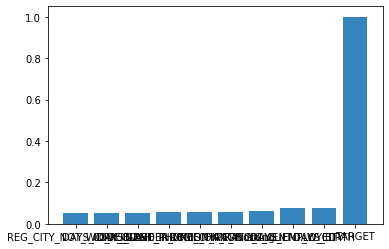

In [27]:

object2 = correlations.tail(10).index
y_pos2 = np.arange(len(object2))
per2 = correlations.tail(10)
plt.bar(object2,per2, align='center',alpha=0.9)
plt.show()

In [28]:
data_corr= pd.DataFrame(correlations.tail(10))

In [29]:
data_corr.drop('TARGET',axis=0,inplace =True)

In [30]:
data_corr = data_corr.rename(columns={"TARGET": "% Correlation with Target"})

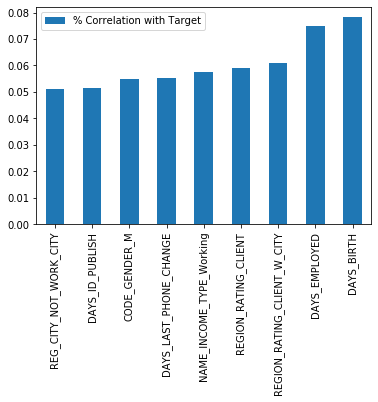

In [31]:
data_corr.plot.bar()

In [32]:
data_corr2= pd.DataFrame(correlations.head(10))

In [33]:
data_corr2 = data_corr2.rename(columns={"TARGET": "% Correlation with Target"})

In [34]:
data_corr2['% Correlation with Target'] = np.absolute(data_corr2['% Correlation with Target'])

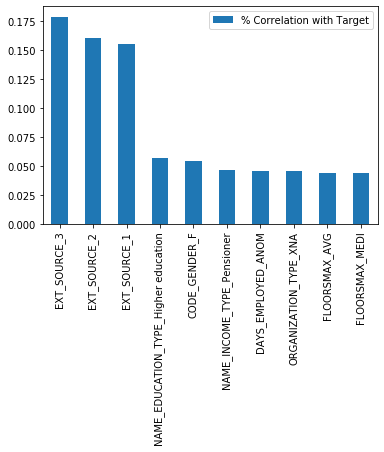

In [35]:
data_corr2.plot.bar()

DAYS_BIRTH have the most positive correlation with target 


More Older More capabilty to par loan

# **EFFECT of Age to Repayment**

In [36]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

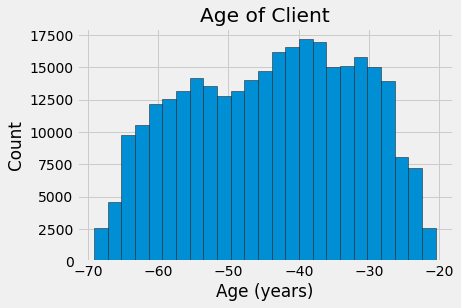

In [37]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');
plt.savefig('Age of Client.png')

#Histogram plot base on age in "YEAR" unit

<module 'matplotlib.pyplot' from 'C:\\Users\\N\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

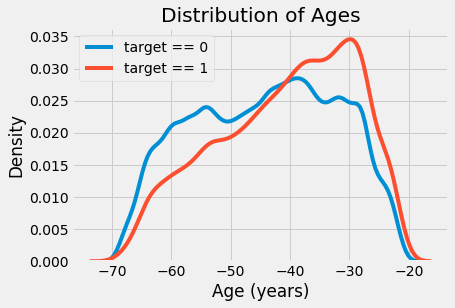

In [38]:
plt.figure(figsize = (6, 4))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');
plt.savefig('Age Target.png')
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\N\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

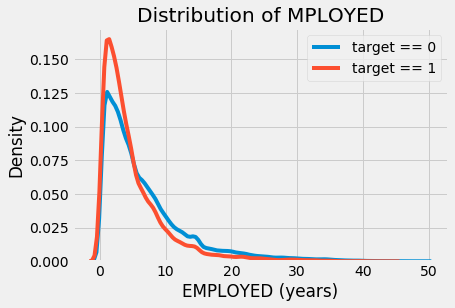

In [39]:
plt.figure(figsize = (6, 4))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_EMPLOYED'] / -365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_EMPLOYED'] / -365, label = 'target == 1')

# Labeling of plot
plt.xlabel('EMPLOYED (years)'); plt.ylabel('Density'); plt.title('Distribution of MPLOYED');
plt.savefig('EMPLOYED Target.png')
plt

cut the age category into bins of 5 years each. Then, for each bin, we calculate the average value of the target, which tells us the ratio of loans that were not repaid in each age category.

In [40]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [41]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


In [1]:
plt.figure(figsize = (4, 4))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

NameError: name 'plt' is not defined

# **Exterior Sources**
The 3 variables with the strongest negative correlations with the target are EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3

In [43]:
# Extract the EXT_SOURCE variables and show correlations btw "TARGET" and  "EACH VARIABLE"
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


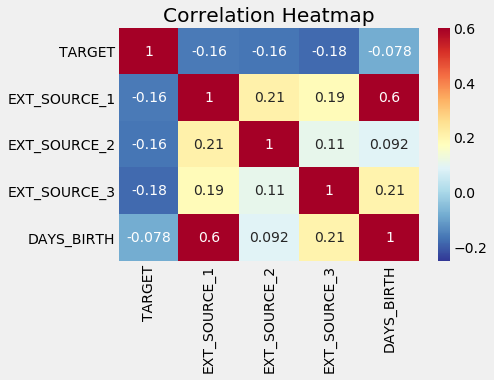

In [44]:
plt.figure(figsize = (6, 4))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

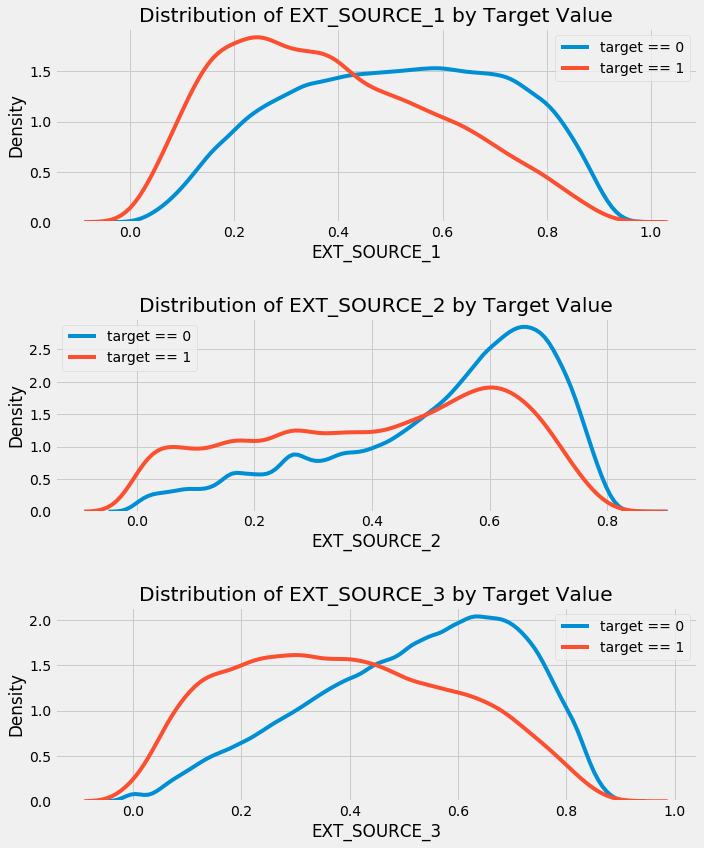

In [45]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

# **Feature Engineering**

*   Polynomial features
*   Domain knowledge feature


Polynomial Features



In [118]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')


poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [119]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [120]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2^2',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_3^2',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_2^2 EXT_SOURCE_3',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3 DAYS_BIRTH^2',
 'DAYS_BIRTH^3']

35 features with main features and Interaction features

In [121]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(10))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
EXT_SOURCE_1                -0.098887
EXT_SOURCE_1^2 DAYS_BIRTH   -0.097507
EXT_SOURCE_1 DAYS_BIRTH^2   -0.094913
EXT_SOURCE_1^2              -0.091034
EXT_SOURCE_1^3              -0.083005
DAYS_BIRTH                  -0.078239
DAYS_BIRTH^2                -0.076672
DAYS_BIRTH^3                -0.074273
TARGET                       1.000000
1                                 NaN
Name: TARGET, dtype: float64


In [122]:
poly_features

,1,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,EXT_SOURCE_1^2,EXT_SOURCE_1 EXT_SOURCE_2,EXT_SOURCE_1 EXT_SOURCE_3,EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2^2,...,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3,TARGET
0,1.0,0.083037,0.262949,0.139376,9461.0,0.006895,0.021834,0.011573,785.612748,0.069142,...,0.009637,654.152107,0.005108,346.733022,2.353667e+07,0.002707,183.785678,1.247560e+07,8.468590e+11,1
1,1.0,0.311267,0.622246,0.535276,16765.0,0.096887,0.193685,0.166614,5218.396475,0.387190,...,0.207254,6491.237078,0.178286,5583.975307,1.748916e+08,0.153368,4803.518937,1.504475e+08,4.712058e+12,0
2,1.0,0.505998,0.555912,0.729567,19046.0,0.256034,0.281290,0.369159,9637.236584,0.309038,...,0.225464,5885.942404,0.295894,7724.580288,2.016572e+08,0.388325,10137.567875,2.646504e+08,6.908939e+12,0
3,1.0,0.505998,0.650442,0.535276,19005.0,0.256034,0.329122,0.270849,9616.490669,0.423074,...,0.226462,8040.528832,0.186365,6616.894625,2.349331e+08,0.153368,5445.325225,1.933364e+08,6.864416e+12,0
4,1.0,0.505998,0.322738,0.535276,19932.0,0.256034,0.163305,0.270849,10085.550751,0.104160,...,0.055754,2076.117157,0.092471,3443.335521,1.282190e+08,0.153368,5710.929881,2.126570e+08,7.918677e+12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1.0,0.145570,0.681632,0.535276,9327.0,0.021191,0.099226,0.077920,1357.735625,0.464623,...,0.248701,4333.535804,0.195302,3403.064320,5.929720e+07,0.153368,2672.378236,4.656525e+07,8.113830e+11,0
307507,1.0,0.505998,0.115992,0.535276,20775.0,0.256034,0.058692,0.270849,10512.107006,0.013454,...,0.007202,279.510194,0.033234,1289.874083,5.006225e+07,0.153368,5952.466801,2.310256e+08,8.966503e+12,0
307508,1.0,0.744026,0.535722,0.218859,14966.0,0.553575,0.398591,0.162837,11135.099105,0.286998,...,0.062812,4295.209004,0.025661,1754.727146,1.199916e+08,0.010483,716.860892,4.902031e+07,3.352102e+12,0
307509,1.0,0.505998,0.514163,0.661024,11961.0,0.256034,0.260165,0.334477,6052.241247,0.264363,...,0.174750,3162.050698,0.224665,4065.229651,7.355897e+07,0.288836,5226.384299,9.456968e+07,1.711207e+12,1


In [137]:
poly_features_test

array([[ 1.00000000e+00,  7.52614491e-01,  7.89654351e-01, ...,
        -4.89615795e+02,  5.90566991e+07, -7.12332761e+12],
       [ 1.00000000e+00,  5.64990202e-01,  2.91655532e-01, ...,
        -3.38620166e+03,  1.41278897e+08, -5.89442945e+12],
       [ 1.00000000e+00,  5.05997931e-01,  6.99786830e-01, ...,
        -7.48039386e+03,  2.45326120e+08, -8.04568669e+12],
       ...,
       [ 1.00000000e+00,  7.33503500e-01,  6.32769551e-01, ...,
        -1.28160051e+03,  7.19238232e+07, -4.03638756e+12],
       [ 1.00000000e+00,  3.73090081e-01,  4.45700983e-01, ...,
        -4.95260708e+03,  1.16176497e+08, -2.72522698e+12],
       [ 1.00000000e+00,  5.05997931e-01,  4.56540667e-01, ...,
        -1.03398023e+03,  5.30490449e+07, -2.72171659e+12]])

Many 'NEW' features have more correlation with the TARGET more than the original features.

In [138]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


In [139]:
poly_features_test

,1,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,EXT_SOURCE_1^2,EXT_SOURCE_1 EXT_SOURCE_2,EXT_SOURCE_1 EXT_SOURCE_3,EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2^2,...,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3,SK_ID_CURR
0,1.0,0.752614,0.789654,0.159520,-19241.0,0.566429,0.594305,0.120057,-14481.055414,0.623554,...,0.099469,-11997.802403,0.020094,-2423.698322,2.923427e+08,0.004059,-489.615795,5.905670e+07,-7.123328e+12,100001
1,1.0,0.564990,0.291656,0.432962,-18064.0,0.319214,0.164783,0.244619,-10205.983005,0.085063,...,0.036829,-1536.577117,0.054673,-2281.043619,9.516956e+07,0.081161,-3386.201665,1.412789e+08,-5.894429e+12,100005
2,1.0,0.505998,0.699787,0.610991,-20038.0,0.256034,0.354091,0.309160,-10139.186531,0.489702,...,0.299203,-9812.640816,0.261238,-8567.521115,2.809794e+08,0.228089,-7480.393855,2.453261e+08,-8.045687e+12,100013
3,1.0,0.525734,0.509677,0.612704,-13976.0,0.276396,0.267955,0.322119,-7347.658072,0.259771,...,0.159163,-3630.555667,0.191336,-4364.443591,9.955450e+07,0.230013,-5246.681115,1.196786e+08,-2.729912e+12,100028
4,1.0,0.202145,0.425687,0.535276,-13040.0,0.040863,0.086051,0.108203,-2635.970697,0.181210,...,0.096997,-2362.974127,0.121968,-2971.298294,7.238455e+07,0.153368,-3736.229463,9.101923e+07,-2.217342e+12,100038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,1.0,0.505998,0.648575,0.643026,-19970.0,0.256034,0.328178,0.325370,-10104.778672,0.420649,...,0.270488,-8400.368742,0.268174,-8328.493414,2.586523e+08,0.265879,-8257.233066,2.564392e+08,-7.964054e+12,456221
48740,1.0,0.505998,0.684596,0.535276,-11186.0,0.256034,0.346404,0.270849,-5660.092851,0.468671,...,0.250869,-5242.555692,0.196151,-4099.084854,8.566112e+07,0.153368,-3205.020151,6.697730e+07,-1.399666e+12,456222
48741,1.0,0.733503,0.632770,0.283712,-15922.0,0.538027,0.464139,0.208104,-11678.842724,0.400397,...,0.113597,-6375.125880,0.050933,-2858.384957,1.604135e+08,0.022837,-1281.600508,7.192382e+07,-4.036388e+12,456223
48742,1.0,0.373090,0.445701,0.595456,-13968.0,0.139196,0.166287,0.222159,-5211.322249,0.198649,...,0.118287,-2774.734348,0.158031,-3707.043157,8.695850e+07,0.211130,-4952.607075,1.161765e+08,-2.725227e+12,456224


In [160]:
app_test_poly.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 0 to 48743
Data columns (total 275 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   SK_ID_CURR                                         int64  
 1   NAME_CONTRACT_TYPE                                 int32  
 2   FLAG_OWN_CAR                                       int32  
 3   FLAG_OWN_REALTY                                    int32  
 4   CNT_CHILDREN                                       int64  
 5   AMT_INCOME_TOTAL                                   float64
 6   AMT_CREDIT                                         float64
 7   AMT_ANNUITY                                        float64
 8   AMT_GOODS_PRICE                                    float64
 9   REGION_POPULATION_RELATIVE                         float64
 10  DAYS_BIRTH_x                                       int64  
 11  DAYS_EMPLOYED                                      fl

## **Domain Knowledge Features**

CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

In [66]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [67]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

In [70]:
app_train_domain.shape

(307511, 245)

**Visualize New Variable**

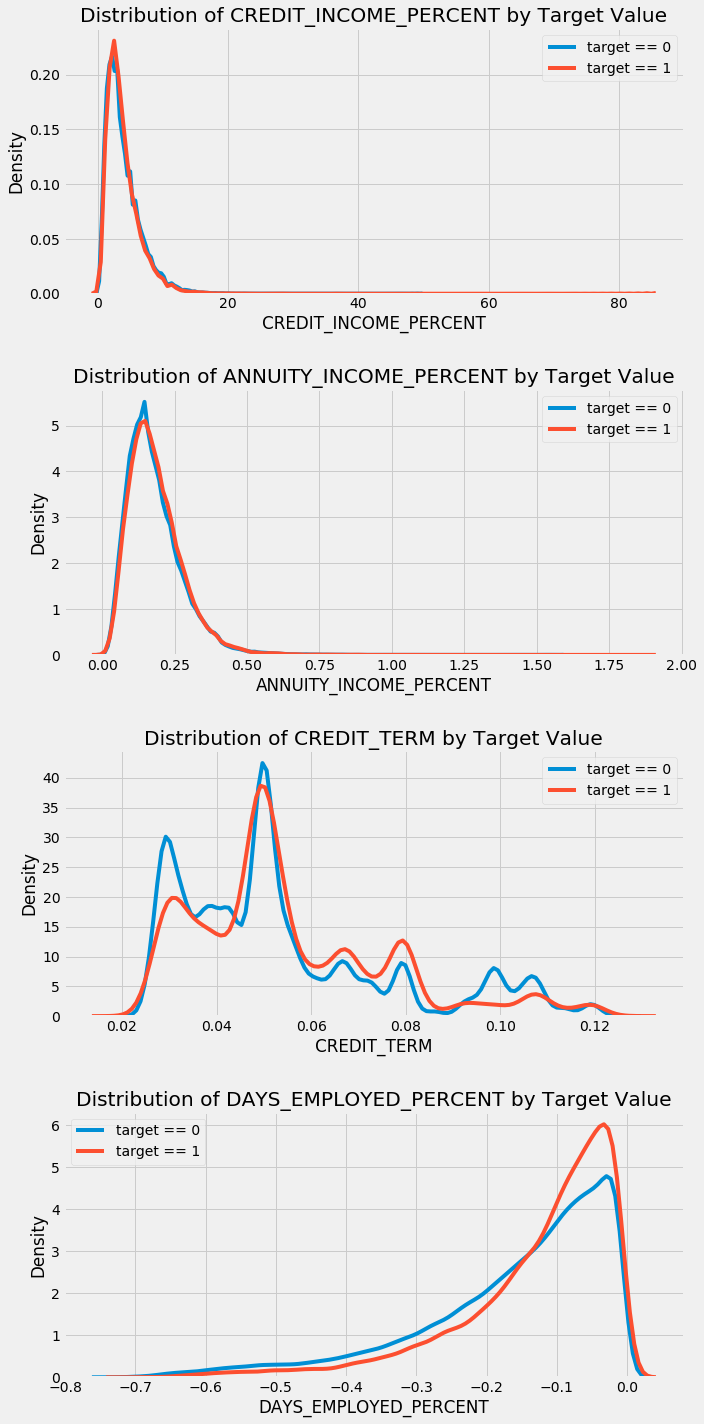

In [54]:
plt.figure(figsize = (10, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

# MIN MAX SCALER

In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy='median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


In [56]:
len(features)

240

In [57]:
df=pd.DataFrame(data=train,columns=features)
df

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,0.000000,0.0,0.0,1.0,0.0,0.001512,0.090287,0.090032,0.077441,0.256321,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.000003,0.0,0.0,0.0,0.0,0.002089,0.311736,0.132924,0.271605,0.045016,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000006,1.0,1.0,1.0,0.0,0.000358,0.022472,0.020025,0.023569,0.134897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000011,0.0,0.0,1.0,0.0,0.000935,0.066837,0.109477,0.063973,0.107023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000014,0.0,0.0,1.0,0.0,0.000819,0.116854,0.078975,0.117845,0.392880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.999989,0.0,0.0,0.0,0.0,0.001127,0.052360,0.101176,0.046016,0.446855,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
307507,0.999992,0.0,0.0,1.0,0.0,0.000396,0.056067,0.040505,0.046016,0.344429,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
307508,0.999994,0.0,0.0,1.0,0.0,0.001089,0.157969,0.110618,0.135802,0.065247,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
307509,0.999997,0.0,0.0,1.0,0.0,0.001243,0.081175,0.072499,0.069585,0.069553,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [58]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 240 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   SK_ID_CURR                                         307511 non-null  float64
 1   NAME_CONTRACT_TYPE                                 307511 non-null  float64
 2   FLAG_OWN_CAR                                       307511 non-null  float64
 3   FLAG_OWN_REALTY                                    307511 non-null  float64
 4   CNT_CHILDREN                                       307511 non-null  float64
 5   AMT_INCOME_TOTAL                                   307511 non-null  float64
 6   AMT_CREDIT                                         307511 non-null  float64
 7   AMT_ANNUITY                                        307511 non-null  float64
 8   AMT_GOODS_PRICE                                    307511 non-null  float

 # Base Line

## Cross Validation

In [101]:
clf_rf = ensemble.RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
clf_log= LogisticRegression(random_state=50)
clf_lgbm = lgb.LGBMClassifier(max_depth=8)
kf = KFold(n_splits=5, shuffle=True,random_state=1)
cv_results1 = cross_val_score(clf_rf,train,train_labels,cv=kf,scoring = 'roc_auc')
cv_results2 = cross_val_score(clf_log,train,train_labels,cv=kf,scoring = 'roc_auc')
cv_results3 = cross_val_score(clf_lgbm,train,train_labels,cv=kf,scoring = 'roc_auc')
print('AUC Model 1:', cv_results1 ,'mean :', cv_results1.mean())
print('AUC Model 2:', cv_results2 ,'mean :', cv_results2.mean())
print('AUC Model 3:', cv_results3 ,'mean :', cv_results3.mean())

NameError: name 'lgb' is not defined

## Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [88]:
# Train on the training data
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   42.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished


RANDOM FOREST GET 0.6848

In [47]:
app_test.shape

(48744, 240)

In [73]:
fs=pd.Series(random_forest.feature_importances_, index=features).sort_values(ascending=True)
fs

FLAG_DOCUMENT_12                0.000000e+00
FLAG_MOBIL                      0.000000e+00
FLAG_DOCUMENT_4                 1.033462e-07
NAME_INCOME_TYPE_Businessman    2.939429e-07
FLAG_DOCUMENT_10                3.511364e-07
                                    ...     
DAYS_REGISTRATION               3.129194e-02
DAYS_ID_PUBLISH                 3.195444e-02
DAYS_BIRTH                      3.211580e-02
EXT_SOURCE_3                    4.665893e-02
EXT_SOURCE_2                    4.914460e-02
Length: 240, dtype: float64

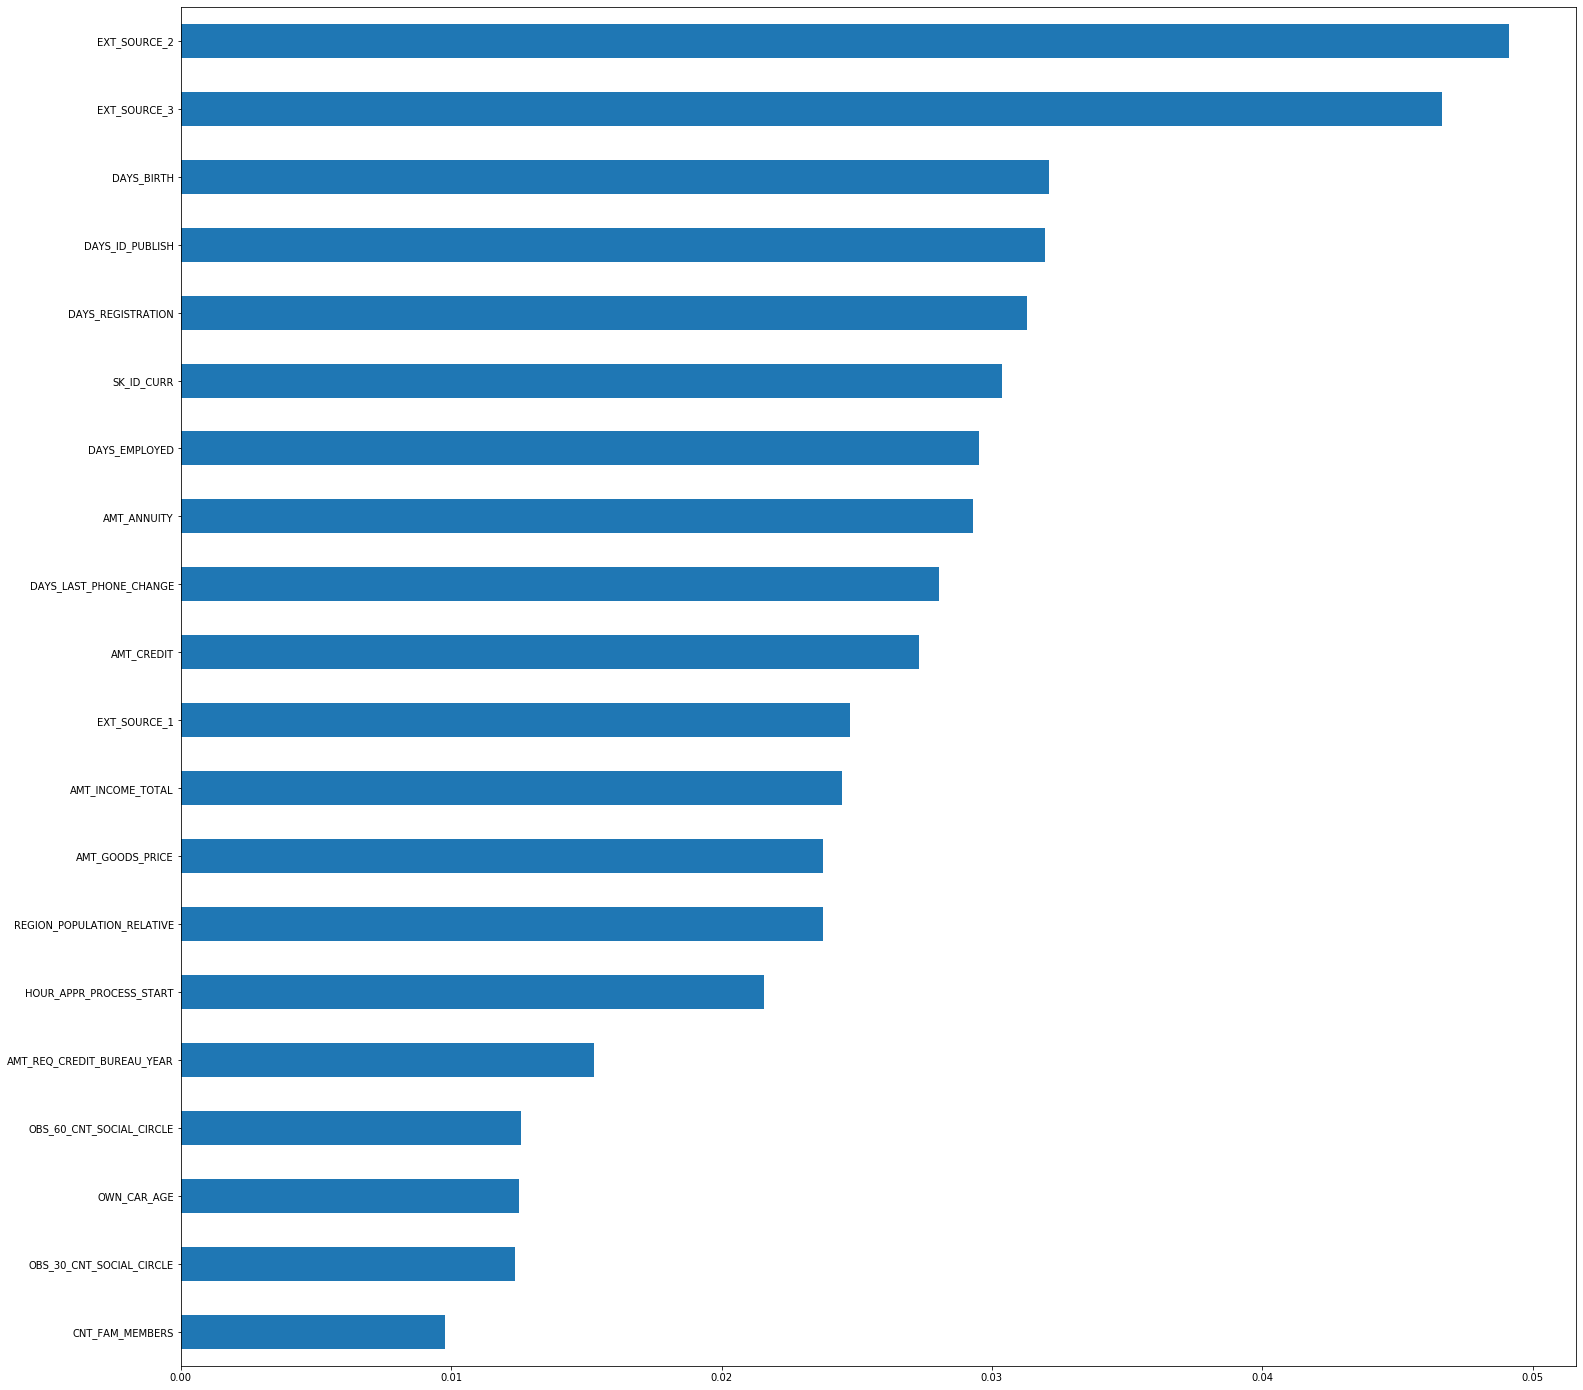

In [76]:
fs.tail(20).plot(kind='barh',figsize=(25,25))

In [123]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


## Lightgbm

In [38]:
import lightgbm as lgb

In [39]:
clf_lgbm2 = lgb.LGBMClassifier(n_estimators=10000,learning_rate=0.02,max_depth=8)
clf_lgbm2.fit(train, train_labels)

NameError: name 'clf' is not defined

In [40]:
ypredd = clf_lgbm2.predict_proba(test)[:,1]
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = ypredd
submit.to_csv('LGBM2', index = False)

LGBM score 0.73658

In [88]:
clf = lgb.LGBMClassifier(
       nthread=4,
       n_estimators=10000,
       learning_rate=0.02,
       num_leaves=32,
       colsample_bytree=0.9497036,
       subsample=0.8715623,
       max_depth=8,
       reg_alpha=0.04,
       reg_lambda=0.073,
       min_split_gain=0.0222415,
       min_child_weight=40,
       silent=-1,
       verbose=-1)
clf.fit(train, train_labels)

LGBMClassifier(colsample_bytree=0.9497036, learning_rate=0.02, max_depth=8,
               min_child_weight=40, min_split_gain=0.0222415,
               n_estimators=10000, nthread=4, num_leaves=32, reg_alpha=0.04,
               reg_lambda=0.073, silent=-1, subsample=0.8715623, verbose=-1)

In [91]:
ypredd = clf.predict_proba(test)[:,1]

In [93]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = ypredd

# Save the submission dataframe
submit.to_csv('LGBM', index = False)

LGMB score 0.71907

## Logistic Regression

In [95]:
log_base = LogisticRegression(random_state=50)
log_base.fit(train, train_labels)
log_baseline = log_base.predict_proba(test)[:,1]

In [96]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_baseline

# Save the submission dataframe
submit.to_csv('log_baseline', index = False)

Logistic Regression score 0.73607

# Domain Feature

In [79]:
drop_target = app_train_domain.drop('TARGET' ,axis = 1)
domain_features_names = list(drop_target.columns)

# Impute the domainnomial features
imputer = SimpleImputer(strategy = 'median')

domain_features = imputer.fit_transform(drop_target)
domain_features_test = imputer.transform(app_test_domain)

# Scale the domainnomial features
scaler = MinMaxScaler(feature_range = (0, 1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

In [82]:
domain_features

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.49097564e-02, 3.77860702e-01, 9.07618039e-01],
       [2.80699391e-06, 0.00000000e+00, 0.00000000e+00, ...,
        7.03683398e-02, 5.39850012e-02, 9.02770585e-01],
       [5.61398781e-06, 1.00000000e+00, 1.00000000e+00, ...,
        5.31929056e-02, 2.72843290e-01, 9.83790727e-01],
       ...,
       [9.99994386e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.04341318e-01, 2.16557325e-01, 2.73795290e-01],
       [9.99997193e-01, 0.00000000e+00, 0.00000000e+00, ...,
        6.28732903e-02, 3.17709013e-01, 4.50977690e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.66138744e-01, 4.95267430e-01, 8.97271814e-01]])

In [81]:
domain_features.shape

(307511, 244)

In [82]:
domain_features_test.shape

(48744, 244)

## Cross Validation

In [51]:
clf1 = ensemble.RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
clf3 = LogisticRegression(random_state=50)
clf4 = lgb.LGBMClassifier(max_depth=8)

In [139]:
kf = KFold(n_splits=5, shuffle=True,random_state=1)

# default scoring for linear regression is r2
cv_results1 = cross_val_score(clf1,domain_features,poly_target,cv=kf,scoring = 'accuracy')
cv_results3 = cross_val_score(clf3,domain_features,poly_target,cv=kf,scoring = 'accuracy')
cv_results4 = cross_val_score(clf4,domain_features,poly_target,cv=kf,scoring = 'accuracy')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   40.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   38.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]:

In [147]:
print('Accuracy Model 1:', cv_results1 ,'mean :', cv_results1.mean())
print('Accuracy Model 3:', cv_results3 ,'mean :', cv_results3.mean())
print('Accuracy Model 4:', cv_results4 ,'mean :', cv_results4.mean())

Accuracy Model 1: [0.91927223 0.91927092 0.92018146 0.91692953 0.92096192] mean : 0.919323211367986
Accuracy Model 3: [0.91919093 0.91917336 0.92010016 0.91668564 0.92089688] mean : 0.9192093941955262
Accuracy Model 4: [0.91989009 0.91943351 0.92078306 0.91707587 0.92102696] mean : 0.9196418981818912


In [46]:
clf_rf = ensemble.RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
clf_log= LogisticRegression(random_state=50)
clf_lgbm = lgb.LGBMClassifier(max_depth=8)
kf = KFold(n_splits=5, shuffle=True,random_state=1)
cv_results1 = cross_val_score(clf_rf,domain_features,train_labels,cv=kf,scoring = 'roc_auc')
cv_results2 = cross_val_score(clf_log,domain_features,train_labels,cv=kf,scoring = 'roc_auc')
cv_results3 = cross_val_score(clf_lgbm,domain_features,train_labels,cv=kf,scoring = 'roc_auc')
print('AUC Model 1:', cv_results1 ,'mean :', cv_results1.mean())
print('AUC Model 2:', cv_results2 ,'mean :', cv_results2.mean())
print('AUC Model 3:', cv_results3 ,'mean :', cv_results3.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   41.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   38.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]:

AUC Model 1: [0.71616141 0.71211138 0.71507169 0.71235315 0.71532644] mean : 0.7142048134895035
AUC Model 2: [0.7541552  0.74379115 0.74215648 0.74565296 0.74623704] mean : 0.7463985652906663
AUC Model 3: [0.77157731 0.76152616 0.7613176  0.76404019 0.76156861] mean : 0.7640059716522553


## LightGbm

In [97]:
clf_lgb = lgb.LGBMClassifier(
       nthread=4,
       n_estimators=10000,
       learning_rate=0.02,
       num_leaves=32,
       colsample_bytree=0.9497036,
       subsample=0.8715623,
       max_depth=8,
       reg_alpha=0.04,
       reg_lambda=0.073,
       min_split_gain=0.0222415,
       min_child_weight=40,
       silent=-1,
       verbose=-1)

In [104]:
clf_lgb.fit(domain_features,poly_target)

LGBMClassifier(colsample_bytree=0.9497036, learning_rate=0.02, max_depth=8,
               min_child_weight=40, min_split_gain=0.0222415,
               n_estimators=10000, nthread=4, num_leaves=32, reg_alpha=0.04,
               reg_lambda=0.073, silent=-1, subsample=0.8715623, verbose=-1)

In [109]:
y_pred_lgb =  clf_lgb.predict_proba(domain_features_test)

In [113]:
submit_lgb = app_test[['SK_ID_CURR']]

In [119]:
submit_lgb['Target'] = y_pred_lgb[:,0]

In [120]:
submit.to_csv('lgb_domain', index = False)

LGBM score 0.73607

# Logistic Regresstion

In [123]:
clf_log = LogisticRegression(random_state=50)

In [124]:
clf_log.fit(domain_features,train_labels)

LogisticRegression(random_state=50)

In [126]:
y_pred_log =clf_log.predict_proba(domain_features_test)[:,1]

In [127]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = y_pred_log

# Save the submission dataframe
submit.to_csv('y_pred_log', index = False)

Logistic Regesstion score 0.73349

## Random Forest 

In [86]:
clf1.fit(domain_features,train_labels)
y_pred_rf =clf1.predict(domain_features_test)


NameError: name 'clf1' is not defined

In [174]:
predictions = clf1.predict_proba(domain_features_test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished


In [175]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_domain.csv', index = False)

Random Forest score 0.69985

# Polynomial Feature

In [54]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
# Impute the polynomial features
imputer = SimpleImputer(strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

In [190]:
poly_features

,1,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,EXT_SOURCE_1^2,EXT_SOURCE_1 EXT_SOURCE_2,EXT_SOURCE_1 EXT_SOURCE_3,EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2^2,...,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3,TARGET,SK_ID_CURR
0,1.0,0.083037,0.262949,0.139376,9461.0,0.006895,0.021834,0.011573,785.612748,0.069142,...,654.152107,0.005108,346.733022,2.353667e+07,0.002707,183.785678,1.247560e+07,8.468590e+11,1,100002
1,1.0,0.311267,0.622246,0.535276,16765.0,0.096887,0.193685,0.166614,5218.396475,0.387190,...,6491.237078,0.178286,5583.975307,1.748916e+08,0.153368,4803.518937,1.504475e+08,4.712058e+12,0,100003
2,1.0,0.505998,0.555912,0.729567,19046.0,0.256034,0.281290,0.369159,9637.236584,0.309038,...,5885.942404,0.295894,7724.580288,2.016572e+08,0.388325,10137.567875,2.646504e+08,6.908939e+12,0,100004
3,1.0,0.505998,0.650442,0.535276,19005.0,0.256034,0.329122,0.270849,9616.490669,0.423074,...,8040.528832,0.186365,6616.894625,2.349331e+08,0.153368,5445.325225,1.933364e+08,6.864416e+12,0,100006
4,1.0,0.505998,0.322738,0.535276,19932.0,0.256034,0.163305,0.270849,10085.550751,0.104160,...,2076.117157,0.092471,3443.335521,1.282190e+08,0.153368,5710.929881,2.126570e+08,7.918677e+12,0,100007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1.0,0.145570,0.681632,0.535276,9327.0,0.021191,0.099226,0.077920,1357.735625,0.464623,...,4333.535804,0.195302,3403.064320,5.929720e+07,0.153368,2672.378236,4.656525e+07,8.113830e+11,0,456251
307507,1.0,0.505998,0.115992,0.535276,20775.0,0.256034,0.058692,0.270849,10512.107006,0.013454,...,279.510194,0.033234,1289.874083,5.006225e+07,0.153368,5952.466801,2.310256e+08,8.966503e+12,0,456252
307508,1.0,0.744026,0.535722,0.218859,14966.0,0.553575,0.398591,0.162837,11135.099105,0.286998,...,4295.209004,0.025661,1754.727146,1.199916e+08,0.010483,716.860892,4.902031e+07,3.352102e+12,0,456253
307509,1.0,0.505998,0.514163,0.661024,11961.0,0.256034,0.260165,0.334477,6052.241247,0.264363,...,3162.050698,0.224665,4065.229651,7.355897e+07,0.288836,5226.384299,9.456968e+07,1.711207e+12,1,456254


## Cross Validation

In [59]:
kf = KFold(n_splits=5, shuffle=True,random_state=1)

# default scoring for linear regression is r2
cv_results5 = cross_val_score(clf1,poly_features,poly_target,cv=kf,scoring = 'accuracy')
cv_results6 = cross_val_score(clf3,poly_features,poly_target,cv=kf,scoring = 'accuracy')
cv_results7 = cross_val_score(clf4,poly_features,poly_target,cv=kf,scoring = 'accuracy')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   52.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   53.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]:

In [60]:
print(cv_results5)
print(cv_results6)
print(cv_results7)

[0.91943482 0.91927092 0.92032779 0.91709213 0.92075054]
[0.91943482 0.91922214 0.92019772 0.91683197 0.92123833]
[0.91990635 0.91956359 0.92073429 0.91718968 0.92107574]


In [47]:
clf_rf = ensemble.RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
clf_log= LogisticRegression(random_state=50)
clf_lgbm = lgb.LGBMClassifier(max_depth=8)
kf = KFold(n_splits=5, shuffle=True,random_state=1)
cv_results1 = cross_val_score(clf_rf,poly_features,train_labels,cv=kf,scoring = 'roc_auc')
cv_results2 = cross_val_score(clf_log,poly_features,train_labels,cv=kf,scoring = 'roc_auc')
cv_results3 = cross_val_score(clf_lgbm,poly_features,train_labels,cv=kf,scoring = 'roc_auc')
print('AUC Model 1:', cv_results1 ,'mean :', cv_results1.mean())
print('AUC Model 2:', cv_results2 ,'mean :', cv_results2.mean())
print('AUC Model 3:', cv_results3 ,'mean :', cv_results3.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]:

AUC Model 1: [1. 1. 1. 1. 1.] mean : 1.0
AUC Model 2: [0.5 0.5 0.5 0.5 0.5] mean : 0.5
AUC Model 3: [1. 1. 1. 1. 1.] mean : 1.0


## Logistic Regression

In [27]:
clf_log_poly= LogisticRegression(random_state=50)
clf_log_poly.fit(poly_features,poly_target)
y_pred = clf_log_poly.predict_proba(poly_features_test)[:, 1]
submit_lgb = app_test[['SK_ID_CURR']]
submit_lgb['TARGET'] = y_pred
submit_lgb.to_csv('clf_log_poly', index = False)

Log score 0.73872

## Lgbm

In [28]:
clf_lgbm_poly= lgb.LGBMClassifier(max_depth=8)
clf_lgbm_poly.fit(poly_features,poly_target)
y_pred = clf_lgbm_poly.predict_proba(poly_features_test)[:, 1]
submit_lgb = app_test[['SK_ID_CURR']]
submit_lgb['TARGET'] = y_pred
submit_lgb.to_csv('clf_lgbm_poly', index = False)

Lgbm score 0.74134

## Random Forest

In [70]:
random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [72]:
random_forest_poly.fit(poly_features,poly_target)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.0min finished


RandomForestClassifier(n_jobs=-1, random_state=50, verbose=1)

In [73]:
y_pred = random_forest_poly.predict(poly_features_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [75]:
submit_lgb = app_test[['SK_ID_CURR']]
submit_lgb['TARGET'] = y_pred

# Save the submission dataframe
submit_lgb.to_csv('summit_rf2', index = False)

In [82]:
predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


In [84]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_poly_engineered.csv', index = False)

score 0.60467

# Hyper-parameter

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(6, 30), 
             'min_child_samples': sp_randint(100, 200), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10],
             'reg_lambda': [0, 1e-1, 1, 5, 10]}
clf = lgb.LGBMClassifier(max_depth=-1, random_state=50, n_estimators=1000)
clf_RS = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=10,
    scoring='roc_auc',
    cv=2,
    refit=True,
    random_state=50,
    verbose=True)

In [79]:
clf_RS.fit(domain_features,train_labels)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

# Feature Selection

In [93]:
FS = feature_importances
FS

,feature,importance
0,SK_ID_CURR,0.030358
1,NAME_CONTRACT_TYPE,0.001834
2,FLAG_OWN_CAR,0.004219
3,FLAG_OWN_REALTY,0.005149
4,CNT_CHILDREN,0.007170
...,...,...
235,"WALLSMATERIAL_MODE_Stone, brick",0.001569
236,WALLSMATERIAL_MODE_Wooden,0.000450
237,EMERGENCYSTATE_MODE_No,0.001697
238,EMERGENCYSTATE_MODE_Yes,0.000383


In [97]:
Feature_select = FS.sort_values(by='importance' ,ascending=False)

In [100]:
Select = Feature_select.head(20)
Select = Select['feature']

In [102]:
cols = list(Select)

['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION',
 'SK_ID_CURR',
 'DAYS_EMPLOYED',
 'AMT_ANNUITY',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_CREDIT',
 'EXT_SOURCE_1',
 'AMT_INCOME_TOTAL',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'HOUR_APPR_PROCESS_START',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OWN_CAR_AGE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'CNT_FAM_MEMBERS']

# PCA

## Baseline

In [73]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head()

,principal component 1,principal component 2
0,-0.592341,1.008964
1,0.214872,1.101267
2,-0.798004,-0.608282
3,-0.363730,-0.645412
4,-0.830058,-0.902785


In [74]:
print(train.shape,test.shape)

(307511, 240) (48744, 240)


In [84]:
clf_rf = ensemble.RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
clf_log= LogisticRegression(random_state=50)
clf_lgbm = lgb.LGBMClassifier(max_depth=8)
kf = KFold(n_splits=5, shuffle=True,random_state=1)
cv_results1 = cross_val_score(clf_rf,principalDf,train_labels,cv=kf,scoring = 'roc_auc')
cv_results2 = cross_val_score(clf_log,principalDf,train_labels,cv=kf,scoring = 'roc_auc')
cv_results3 = cross_val_score(clf_lgbm,principalDf,train_labels,cv=kf,scoring = 'roc_auc')
print('AUC Model 1:', cv_results1 ,'mean :', cv_results1.mean())
print('AUC Model 2:', cv_results2 ,'mean :', cv_results2.mean())
print('AUC Model 3:', cv_results3 ,'mean :', cv_results3.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]:

AUC Model 1: [0.54125301 0.53899135 0.53265858 0.54259846 0.52993134] mean : 0.5370865466210935
AUC Model 2: [0.60299438 0.59282623 0.59064191 0.59598032 0.59485435] mean : 0.5954594371922955
AUC Model 3: [0.61356004 0.60469165 0.60278514 0.60678033 0.60058451] mean : 0.6056803339430111


## Domain

In [81]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(domain_features)
principalDf2 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf2.head()

,principal component 1,principal component 2
0,-0.592731,1.007173
1,0.218162,1.101489
2,-0.795772,-0.610464
3,-0.368089,-0.645710
4,-0.828453,-0.903497


In [85]:
clf_rf = ensemble.RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
clf_log= LogisticRegression(random_state=50)
clf_lgbm = lgb.LGBMClassifier(max_depth=8)
kf = KFold(n_splits=5, shuffle=True,random_state=1)
cv_results1 = cross_val_score(clf_rf,principalDf2,train_labels,cv=kf,scoring = 'roc_auc')
cv_results2 = cross_val_score(clf_log,principalDf2,train_labels,cv=kf,scoring = 'roc_auc')
cv_results3 = cross_val_score(clf_lgbm,principalDf2,train_labels,cv=kf,scoring = 'roc_auc')
print('AUC Model 1:', cv_results1 ,'mean :', cv_results1.mean())
print('AUC Model 2:', cv_results2 ,'mean :', cv_results2.mean())
print('AUC Model 3:', cv_results3 ,'mean :', cv_results3.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]:

AUC Model 1: [0.53690535 0.54260837 0.53835328 0.54189933 0.5371819 ] mean : 0.5393896462316137
AUC Model 2: [0.60302383 0.59284086 0.59065504 0.59597353 0.59486934] mean : 0.5954725193300977
AUC Model 3: [0.61337349 0.60490912 0.60179381 0.60712319 0.60050964] mean : 0.6055418505265612


Hyper parameter Logistic

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
parameters = {'C':[0.1,1,10],'max_iter':[100,200,500]}
clf_log_poly= LogisticRegression(random_state=50)
clf_lo = GridSearchCV(clf_log_poly, parameters, cv=5,scoring='roc_auc')

clf_lo.fit(poly_features,poly_target)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=50, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'max_iter': [100, 200, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [121]:
print ("best estimator: ", clf_lo.best_estimator_)
print ("best score: ", clf_lo.best_score_)
print ("best params: ", clf_lo.best_params_)

best estimator:  LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=50, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
best score:  0.7485930924028483
best params:  {'C': 10, 'max_iter': 500}


In [55]:
poly_features.shape

(307511, 275)

Hyper parameter LGBM

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
param_test ={'max_depth=': [ 10, 50,100],
             'num_leaves': [30,50 ,100,200]}
clf_lgb_poly = lgb.LGBMClassifier()
clf_lgb = GridSearchCV(clf_lgb_poly, param_test, cv=3,scoring='roc_auc')

clf_lgb.fit(poly_features,poly_target)

[LightGBM] [Warning] max_depth is set=-1, max_depth=10 will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] max_depth is set=-1, max_depth=10 will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] max_depth is set=-1, max_depth=10 will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] max_depth is set=-1, max_depth=10 will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] max_depth is set=-1, max_depth=10 will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] max_depth is set=-1, max_depth=10 will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] max_depth is set=-1, max_depth=10 will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] max_depth is set=-1, max_depth=10 will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] max_depth is set=-1, max_depth=10 will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] max_depth is set=-1, max_depth=10 will be ignored. Current value: max_depth=-1


GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth=': [10, 50, 100],
                         'num_leaves': [

In [59]:
print ("best estimator: ", clf_lgb.best_estimator_)
print ("best score: ", clf_lgb.best_score_)
print ("best params: ", clf_lgb.best_params_)

best estimator:  LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               max_depth==10, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=30,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
best score:  0.7468931945231
best params:  {'max_depth=': 10, 'num_leaves': 30}


## Domian + Poly

In [152]:
app_train_domain1 = app_train.copy()
app_test_domain1 = app_test.copy()

app_train_domain1['CREDIT_INCOME_PERCENT'] = app_train_domain1['AMT_CREDIT'] / app_train_domain1['AMT_INCOME_TOTAL']
app_train_domain1['ANNUITY_INCOME_PERCENT'] = app_train_domain1['AMT_ANNUITY'] / app_train_domain1['AMT_INCOME_TOTAL']
app_train_domain1['CREDIT_TERM'] = app_train_domain1['AMT_ANNUITY'] / app_train_domain1['AMT_CREDIT']
app_train_domain1['DAYS_EMPLOYED_PERCENT'] = app_train_domain1['DAYS_EMPLOYED'] / app_train_domain1['DAYS_BIRTH']

In [153]:
app_test_domain1['CREDIT_INCOME_PERCENT'] = app_test_domain1['AMT_CREDIT'] / app_test_domain1['AMT_INCOME_TOTAL']
app_test_domain1['ANNUITY_INCOME_PERCENT'] = app_test_domain1['AMT_ANNUITY'] / app_test_domain1['AMT_INCOME_TOTAL']
app_test_domain1['CREDIT_TERM'] = app_test_domain1['AMT_ANNUITY'] / app_test_domain1['AMT_CREDIT']
app_test_domain1['DAYS_EMPLOYED_PERCENT'] = app_test_domain1['DAYS_EMPLOYED'] / app_test_domain1['DAYS_BIRTH']

In [154]:
app_train_domain1.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 245 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   SK_ID_CURR                                         307511 non-null  int64  
 1   NAME_CONTRACT_TYPE                                 307511 non-null  int32  
 2   FLAG_OWN_CAR                                       307511 non-null  int32  
 3   FLAG_OWN_REALTY                                    307511 non-null  int32  
 4   CNT_CHILDREN                                       307511 non-null  int64  
 5   AMT_INCOME_TOTAL                                   307511 non-null  float64
 6   AMT_CREDIT                                         307511 non-null  float64
 7   AMT_ANNUITY                                        307499 non-null  float64
 8   AMT_GOODS_PRICE                                    307233 non-null  float

In [155]:
poly_features_1 = pd.DataFrame(poly_features_1, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

In [156]:
poly_features_1

,1,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,EXT_SOURCE_1^2,EXT_SOURCE_1 EXT_SOURCE_2,EXT_SOURCE_1 EXT_SOURCE_3,EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2^2,...,EXT_SOURCE_2^3,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3
0,1.0,0.083037,0.262949,0.139376,9461.0,0.006895,0.021834,0.011573,785.612748,0.069142,...,0.018181,0.009637,654.152107,0.005108,346.733022,2.353667e+07,0.002707,183.785678,1.247560e+07,8.468590e+11
1,1.0,0.311267,0.622246,0.535276,16765.0,0.096887,0.193685,0.166614,5218.396475,0.387190,...,0.240927,0.207254,6491.237078,0.178286,5583.975307,1.748916e+08,0.153368,4803.518937,1.504475e+08,4.712058e+12
2,1.0,0.505998,0.555912,0.729567,19046.0,0.256034,0.281290,0.369159,9637.236584,0.309038,...,0.171798,0.225464,5885.942404,0.295894,7724.580288,2.016572e+08,0.388325,10137.567875,2.646504e+08,6.908939e+12
3,1.0,0.505998,0.650442,0.535276,19005.0,0.256034,0.329122,0.270849,9616.490669,0.423074,...,0.275185,0.226462,8040.528832,0.186365,6616.894625,2.349331e+08,0.153368,5445.325225,1.933364e+08,6.864416e+12
4,1.0,0.505998,0.322738,0.535276,19932.0,0.256034,0.163305,0.270849,10085.550751,0.104160,...,0.033616,0.055754,2076.117157,0.092471,3443.335521,1.282190e+08,0.153368,5710.929881,2.126570e+08,7.918677e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1.0,0.145570,0.681632,0.535276,9327.0,0.021191,0.099226,0.077920,1357.735625,0.464623,...,0.316702,0.248701,4333.535804,0.195302,3403.064320,5.929720e+07,0.153368,2672.378236,4.656525e+07,8.113830e+11
307507,1.0,0.505998,0.115992,0.535276,20775.0,0.256034,0.058692,0.270849,10512.107006,0.013454,...,0.001561,0.007202,279.510194,0.033234,1289.874083,5.006225e+07,0.153368,5952.466801,2.310256e+08,8.966503e+12
307508,1.0,0.744026,0.535722,0.218859,14966.0,0.553575,0.398591,0.162837,11135.099105,0.286998,...,0.153751,0.062812,4295.209004,0.025661,1754.727146,1.199916e+08,0.010483,716.860892,4.902031e+07,3.352102e+12
307509,1.0,0.505998,0.514163,0.661024,11961.0,0.256034,0.260165,0.334477,6052.241247,0.264363,...,0.135926,0.174750,3162.050698,0.224665,4065.229651,7.355897e+07,0.288836,5226.384299,9.456968e+07,1.711207e+12


In [169]:
# Merge polynomial features into training dataframe
poly_features_1['SK_ID_CURR'] = app_train_domain1['SK_ID_CURR']
app_train_poly1 = app_train_domain1.merge(poly_features_1, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test_domain1['SK_ID_CURR']
app_test_poly1 = app_test_domain1.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')
TARGER_final =  app_train_poly1['TARGET']

# Print out the new shapes
print('Training data with polynomial and domain features shape: ', app_train_poly1.shape)
print('Testing data with polynomial domain1 features shape:  ', app_test_poly1.shape)

Training data with polynomial and domain features shape:  (307511, 280)
Testing data with polynomial domain1 features shape:   (48744, 279)


In [170]:
app_train_poly1.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 280 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   SK_ID_CURR                                         307511 non-null  int64  
 1   NAME_CONTRACT_TYPE                                 307511 non-null  int32  
 2   FLAG_OWN_CAR                                       307511 non-null  int32  
 3   FLAG_OWN_REALTY                                    307511 non-null  int32  
 4   CNT_CHILDREN                                       307511 non-null  int64  
 5   AMT_INCOME_TOTAL                                   307511 non-null  float64
 6   AMT_CREDIT                                         307511 non-null  float64
 7   AMT_ANNUITY                                        307499 non-null  float64
 8   AMT_GOODS_PRICE                                    307233 non-null  float

In [173]:
drop_target1 = app_train_poly1.drop('TARGET' ,axis = 1)
domain_features_names = list(drop_target.columns)

imputer = SimpleImputer(strategy = 'median')

domain_poly_features = imputer.fit_transform(drop_target1)
domain_poly_features_test = imputer.transform(app_test_poly1)

# Scale the domainnomial features
scaler = MinMaxScaler(feature_range = (0, 1))

domain_poly_features_final = scaler.fit_transform(domain_poly_features)
domain_features_final_test = scaler.transform(domain_poly_features_test)

In [174]:
domain_ploy_features_final

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.65615892e-03, 2.30770153e-02, 2.72943738e-02],
       [2.80699391e-06, 0.00000000e+00, 0.00000000e+00, ...,
        2.52381267e-01, 2.78935807e-01, 2.74456776e-01],
       [5.61398781e-06, 1.00000000e+00, 1.00000000e+00, ...,
        5.32637189e-01, 4.90716594e-01, 4.14937545e-01],
       ...,
       [9.99994386e-01, 0.00000000e+00, 0.00000000e+00, ...,
        3.76644294e-02, 9.08464884e-02, 1.87493575e-01],
       [9.99997193e-01, 0.00000000e+00, 0.00000000e+00, ...,
        2.74599008e-01, 1.75314431e-01, 8.25655819e-02],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.14938704e-02, 5.99663235e-02, 2.79390053e-01]])

In [223]:
domain_poly_features_final1 = pd.DataFrame(domain_poly_features_final, 
                                  columns = app_test_poly1.columns )
domain_poly_features_final.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 279 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   SK_ID_CURR                                         float64
 1   NAME_CONTRACT_TYPE                                 float64
 2   FLAG_OWN_CAR                                       float64
 3   FLAG_OWN_REALTY                                    float64
 4   CNT_CHILDREN                                       float64
 5   AMT_INCOME_TOTAL                                   float64
 6   AMT_CREDIT                                         float64
 7   AMT_ANNUITY                                        float64
 8   AMT_GOODS_PRICE                                    float64
 9   REGION_POPULATION_RELATIVE                         float64
 10  DAYS_BIRTH_x                                       float64
 11  DAYS_EMPLOYED                                      

In [199]:
clf1 = ensemble.RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
clf3 = LogisticRegression(random_state=50)
clf4 = lgb.LGBMClassifier(max_depth=8)

In [208]:
clf1.fit(domain_ploy_features_final,TARGER_final)
y_pred = clf1.predict_proba(domain_features_final_test)[:, 1]
submit_random = app_test_poly1[['SK_ID_CURR']]
submit_random['TARGET'] = y_pred
submit_random.to_csv('clf_poly_domain_random.csv', index = False)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


In [213]:
clf3.fit(domain_ploy_features_final,TARGER_final)
y_pred_3 = clf3.predict_proba(domain_features_final_test)[:, 1]
submit_logis = app_test_poly1[['SK_ID_CURR']]
submit_logis['TARGET'] = y_pred_3
submit_logis.to_csv('clf_poly_domain_logis.csv', index = False)

In [214]:
clf4.fit(domain_ploy_features_final,TARGER_final)
y_pred_4 = clf4.predict_proba(domain_features_final_test)[:, 1]
submit_lgb = app_test_poly1[['SK_ID_CURR']]
submit_lgb['TARGET'] = y_pred_4
submit_lgb.to_csv('clf_poly_domain_lgb.csv', index = False)

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


In [253]:
TARGER_final.shape

(307511,)

## PCA Domian + Poly

In [233]:
domain_ploy_features_final

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.65615892e-03, 2.30770153e-02, 2.72943738e-02],
       [2.80699391e-06, 0.00000000e+00, 0.00000000e+00, ...,
        2.52381267e-01, 2.78935807e-01, 2.74456776e-01],
       [5.61398781e-06, 1.00000000e+00, 1.00000000e+00, ...,
        5.32637189e-01, 4.90716594e-01, 4.14937545e-01],
       ...,
       [9.99994386e-01, 0.00000000e+00, 0.00000000e+00, ...,
        3.76644294e-02, 9.08464884e-02, 1.87493575e-01],
       [9.99997193e-01, 0.00000000e+00, 0.00000000e+00, ...,
        2.74599008e-01, 1.75314431e-01, 8.25655819e-02],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.14938704e-02, 5.99663235e-02, 2.79390053e-01]])

In [235]:
domain_features_final_test

array([[-2.80699391e-06,  0.00000000e+00,  0.00000000e+00, ...,
        -2.57249845e-02,  1.09458232e-01, -4.82363796e-01],
       [ 8.42098172e-06,  0.00000000e+00,  0.00000000e+00, ...,
        -1.77914316e-01,  2.61933236e-01, -4.03781196e-01],
       [ 3.08769330e-05,  0.00000000e+00,  1.00000000e+00, ...,
        -3.93027005e-01,  4.54881139e-01, -5.41344578e-01],
       ...,
       [ 9.99910176e-01,  0.00000000e+00,  1.00000000e+00, ...,
        -6.73366023e-02,  1.33319364e-01, -2.84967639e-01],
       [ 9.99912983e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -2.60214722e-01,  2.15382685e-01, -2.01124721e-01],
       [ 9.99985965e-01,  0.00000000e+00,  1.00000000e+00, ...,
        -5.43264015e-02,  9.83174797e-02, -2.00900248e-01]])

In [243]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.8)
pca.fit(domain_ploy_features_final)

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [244]:
pca.n_components_

36

In [245]:
train_pca = pca.transform(domain_ploy_features_final)
test_pca = pca.transform(domain_features_final_test)
print (train_pca.shape, test_pca.shape)

(307511, 36) (48744, 36)


In [254]:
train_pca

array([[-1.32537608,  0.65620714, -0.68229103, ..., -0.15176191,
         0.25187735,  0.04770572],
       [ 0.12659269,  1.13967897, -0.37038961, ..., -0.22612335,
         0.96085172,  0.02140011],
       [-0.29227553, -0.54135174,  1.14443573, ...,  0.04948933,
         0.20794905,  0.04802443],
       ...,
       [-0.42706047,  1.05719225, -0.84804232, ...,  0.5783074 ,
        -0.64746719,  0.03832344],
       [-0.34572013,  0.39479065, -0.42520307, ..., -0.08033086,
         0.12415929,  0.01559696],
       [-0.46834237,  1.15745326, -0.00391675, ..., -0.32044888,
         0.20700984, -0.12984502]])

In [248]:
clf1.fit(train_pca,TARGER_final)
y_pred_pca = clf1.predict_proba(test_pca)[:, 1]
submit_random = app_test_poly1[['SK_ID_CURR']]
submit_random['TARGET'] = y_pred_pca
submit_random.to_csv('clf_poly_domain_random_pca.csv', index = False)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [261]:
(test_pca)[:, 1].shape

(48744,)

In [262]:
clf3.fit(train_pca,TARGER_final)
y_pred_pca3 = clf3.predict_proba(test_pca)[:, 1]
submit_logis = app_test_poly1[['SK_ID_CURR']]
submit_logis['TARGET'] = y_pred_pca3
submit_logis.to_csv('clf_poly_domain_logis_pca.csv', index = False)

In [263]:
clf4.fit(train_pca,TARGER_final)
y_pred_pca4 = clf4.predict_proba(test_pca)[:, 1]
submit_lgb = app_test_poly1[['SK_ID_CURR']]
submit_lgb['TARGET'] = y_pred_pca4
submit_lgb.to_csv('clf_poly_domain_lgb_pca.csv', index = False)

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
